firsts:  
same subject correlation between the two trials  
Threshold of .7, reject those who are lower.  
find hit and assignment id. 
automatically execute the bonus and rejections  
bash script  
second:  

In [1]:
import PIL
import json
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import basename

## PHASE 1: jsonStr Extraction

In [2]:
# Creates the dataframe
columnNames = ["SubjectID", "#", "trialId", "jsonStr"]
# File Selector
trial = pd.read_csv("trialdata.csv", names=columnNames, header=None)

In [3]:
# Set up the values we want to extract from the jsonStr column. The jsonStr column contains
# the data 
keys = ['rt', 'trial_type', 'view_history', 'internal_node_id', 'time_elapsed',
        'trial_index', 'responses', 'questions', 'imgName', 'isRepeat',
        'isRandom', 'stimulus', 'key_press', 'payment', 'total_unique_trials', 'random_num']
data = {key: [] for key in keys}

In [4]:
# Extractor
for jsonStr in trial.jsonStr:
    jsonDict = json.loads(jsonStr)
    for key in keys:
        try:
            data[key].append(jsonDict[key])
        except KeyError:
            data[key].append(None)

In [5]:
# Inserts the data into the trial dataframe
for key in keys:
    trial[key] = data[key]

In [6]:
# These are the keys for the question prompt.
# set up the values we want to extract for the question
qKeys = ['prompt', 'options', 'required', 'horizontal', 'labels']
qData = {key: [] for key in qKeys}

In [7]:
# Extractor for question - potential for multiple questions in a single trial hence the 
# lists
for questions in trial.questions:
    if questions is not None:
        prompt = []
        options = []
        required = []
        horizontal = []
        labels = []
        # row in the Column
        for question in json.loads(questions):
            try:
                prompt.append(question[key])
            except KeyError:
                prompt.append(None)

            try:
                options.append(question[key])
            except KeyError:
                options.append(None)

            try:
                required.append(question[key])
            except KeyError:
                required.append(None)

            try:
                horizontal.append(question[key])
            except KeyError:
                horizontal.append(None)

            try:
                labels.append(question[key])
            except KeyError:
                labels.append(None)

        qData['prompt'].append(prompt)
        qData['options'].append(options)
        qData['required'].append(required)
        qData['horizontal'].append(horizontal)
        qData['labels'].append(labels)
    else:
        for key in qKeys:
            qData[key].append([None])

In [8]:
# Inserts question dictionary values into trial dataframe
for key in qKeys:
    trial[key] = qData[key]
trial.groupby('SubjectID').count()

,#,trialId,jsonStr,rt,trial_type,view_history,internal_node_id,time_elapsed,trial_index,responses,...,stimulus,key_press,payment,total_unique_trials,random_num,prompt,options,required,horizontal,labels
SubjectID,,,,,,,,,,,,,,,,,,,,,
A1NK84W9T83USS:3LUY3GC6317LMN19QZBARC2ZH1EP7W,171,171,171,166,171,2,171,171,171,164,...,5,0,1,1,1,171,171,171,171,171
A1TLNLB9D87H6:33SA9F9TRZ1WFBDKPT3BPG2CWLMWEL,171,171,171,166,171,2,171,171,171,164,...,5,0,1,1,1,171,171,171,171,171
A1UT24L635HEZ6:33CUSNVVNPJ4G97BEN15JQ343BK88I,171,171,171,166,171,2,171,171,171,164,...,5,0,1,1,1,171,171,171,171,171
A1VZSFHTU51JP0:3IRIK4HM3CRJOYE02KKC1Y3WN7EC65,171,171,171,166,171,2,171,171,171,164,...,5,0,1,1,1,171,171,171,171,171
A2H6K1XIK4LY7O:3YGXWBAF72O59BAMJWRX40JIRG8C4K,172,172,172,169,172,2,172,172,172,165,...,5,2,1,1,1,172,172,172,172,172
A2HYRO7O5TM42J:3PJUZCGDJ8N4UEQLJF7JJMYFNH2897,172,172,172,167,172,2,172,172,172,165,...,5,0,1,1,1,172,172,172,172,172
A2OU924AC8XCYC:3HPZF4IVNO0L7IO683F4KPNPMH8CY6,171,171,171,166,171,2,171,171,171,164,...,5,0,1,1,1,171,171,171,171,171
A3IMB1JAMHP1KK:3IO1LGZLKB4HCVONL847ZC7DXGU86W,171,171,171,166,171,2,171,171,171,164,...,5,0,1,1,1,171,171,171,171,171
A3SD02HCW68EUL:3NS0A6KXC6FYTKEG6BD6ONH6Q33GZA,173,173,173,171,173,2,173,173,173,166,...,5,3,1,1,1,173,173,173,173,173


## PHASE 2: Subject Identification, Making the DF easier to read, output

In [9]:
# Debug ID: A6XBXQC3G59N8:3VP0C6EFSI3WXKQRF9ERIP60I906M0
trial = trial[trial.SubjectID != 'A6XBXQC3G59N8:3VP0C6EFSI3WXKQRF9ERIP60I906M0']

In [10]:
# We want a readable ID that we can quickly scan
subID_easy = {subId: None for subId in trial.SubjectID}
for i, key in enumerate(subID_easy):
    subID_easy[key] = int(i + 1)
trial.loc[:, 'SubjectID'] = trial.SubjectID.map(subID_easy)

In [11]:
# t contains subject attributes, payment, and total_unique_trials
t = trial[trial.trial_type == 'survey-multi-choice']
# how to select the last survey-multi-choice -> dictionary
#t.groupby('SubjectID')#.count()

#for att in t.iterrows():
#    print(att)

In [12]:
subAttribute = {iden: json.loads(resp) for iden, resp in zip(t.SubjectID, t.responses)}
payment = {i + 1: pay for i, pay in enumerate(t.payment)}
tut = {i + 1: to for i, to in enumerate(t.total_unique_trials)}

In [13]:
# This is used to identify the subject's location
numSubjects = max(trial.SubjectID)
subLoc = {i: None for i in range(1, numSubjects + 1)}
txts = trial[trial.trial_type == 'survey-text-req']
for i, txt in zip(txts.SubjectID, txts.responses):
    if i <= 20 and subLoc[i] is None:
        subLoc[i] = json.loads(txt)

In [14]:
# Reseting allows the index to be proper since we removed the debugger
trial = trial.reset_index(drop=True)

In [15]:
# Create the new columns/change the values in the columns
for i, subject in enumerate(trial.SubjectID):
    trial.loc[i, 'Age'] = subAttribute[subject]['Q0']
    trial.loc[i, 'Gender'] = subAttribute[subject]['Q1']
    trial.loc[i, 'Hispanic/Latino'] = subAttribute[subject]['Q2']
    trial.loc[i, 'Race'] = subAttribute[subject]['Q4']
    trial.loc[i, 'Education'] = subAttribute[subject]['Q5']
    
    trial.loc[i, 'State'] = subLoc[subject]['Q0']
    trial.loc[i, 'City'] = subLoc[subject]['Q1']
    trial.loc[i, 'Zipcode'] = subLoc[subject]['Q2']
    
    trial.loc[i, 'payment'] = payment[subject]
    
    trial.loc[i, 'total_unique_trials'] = tut[subject]

In [16]:
# Extraction of feedback and output of file
feedbacks = trial[trial.trial_type == 'survey-text'].responses
#>>>with open('feedback.txt', 'w') as f:
#>>>    for fb in feedbacks:
#>>>        statement = json.loads(fb)['Q0']
#>>>        if statement:
#>>>            f.write(statement + '\n')

In [17]:
# We now only want the trials
trial = trial[trial.trial_type == 'face-likert-amanda'].reset_index(drop=True)

In [18]:
# Makes the image names easier to read
names = sorted(set(trial.imgName), key=list(trial.imgName).index)
easy_name = {name: None for name in names}
for i, key in enumerate(easy_name):
    easy_name[key] = int(i + 1)
trial['ImgID'] = trial.imgName.map(easy_name)

In [19]:
# Score - we want to extract it from the json type and change it
for i,score in enumerate(trial.responses):
    trial.loc[i, 'Score'] = json.loads(score)['Q0']

In [20]:
# imgName -> we want it to be converted so that we have only the file name
for i, img in enumerate(trial.imgName):
    trial.loc[i, 'imgName'] = basename(img)

In [21]:
trial.columns

Index(['SubjectID', '#', 'trialId', 'jsonStr', 'rt', 'trial_type',
       'view_history', 'internal_node_id', 'time_elapsed', 'trial_index',
       'responses', 'questions', 'imgName', 'isRepeat', 'isRandom', 'stimulus',
       'key_press', 'payment', 'total_unique_trials', 'random_num', 'prompt',
       'options', 'required', 'horizontal', 'labels', 'Age', 'Gender',
       'Hispanic/Latino', 'Race', 'Education', 'State', 'City', 'Zipcode',
       'ImgID', 'Score'],
      dtype='object')

In [22]:
# Fixes order and selects the columns we want
trial = trial[['SubjectID', 'Score', 'rt', 'ImgID', 'imgName', 'trial_index', 'Age', 'Gender', 'Hispanic/Latino', 'Race', 'Education', 'State', 'Zipcode', 'payment', 'total_unique_trials']]

In [23]:
trial

,SubjectID,Score,rt,ImgID,imgName,trial_index,Age,Gender,Hispanic/Latino,Race,Education,State,Zipcode,payment,total_unique_trials
0,1,4.0,6706.0,1,empty-image-1.jpg,6,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
1,1,7.0,6257.0,2,Google_1_Kenneth Cabral_19_oval.jpg,8,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
2,1,3.0,3712.0,3,Google_1_Gary Nance_3_oval.jpg,9,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
3,1,4.0,3759.0,4,Google_1_Victoria Ambrose_17_oval.jpg,10,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
4,1,2.0,4251.0,5,Google_1_Claudia Rohrer_13_oval.jpg,11,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
5,1,3.0,2531.0,6,Google_1_Frank Luke_9_oval.jpg,12,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
6,1,3.0,2114.0,7,Google_1_Gregory Arriola_3_oval.jpg,13,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
7,1,6.0,2522.0,8,Google_1_Louis Mceachern_7_oval.jpg,14,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
8,1,4.0,3836.0,9,Google_1_Sean Raleigh_7_oval.jpg,15,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0
9,1,3.0,2553.0,10,Google_1_Norman Westfall_5_oval.jpg,16,26-35,Male,No,White,High school degree or equivalent (e.g. GED),CO,80014,1.0,80.0


#### Unusable Data Subjects and reason
Subject 3: repeating pattern of 7, 8  
Subject 7: large number of repeating numbers  
Subject 9: repeating numbers  
Subject 14: 0,8 repeat numbers  

Subjects 7, 9, 14 are the same individual as according to location, pattern, and demograhic questions  
      can we ban this individual?  

In [24]:
unusable = [3, 7, 9, 14]
filteredTrial = trial
for iden in unusable:
    filteredTrial = filteredTrial[filteredTrial.SubjectID != iden]

In [25]:
# Output the new file into current directory
#>>>trial.to_csv('trialDataClean.csv')

## PHASE 4: General Analysis

#### response time

In [26]:
filteredTrial.rt.describe()

count     1127.000000
mean      3094.889086
std       1876.528015
min       1445.000000
25%       2304.000000
50%       2731.000000
75%       3301.500000
max      42973.000000
Name: rt, dtype: float64

(array([  0.,   0.,   3.,  89., 326., 299., 183.,  83.,  54.,  25.,  20.,
          6.,   7.,  10.,   4.,   1.,   1.,   3.,   0.]),
 array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
        5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500]),
 <a list of 19 Patch objects>)

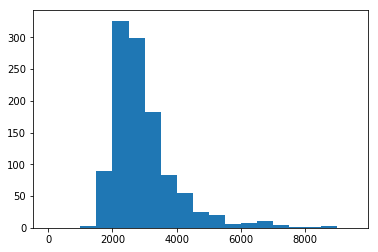

In [27]:
plt.hist(filteredTrial.rt, bins=list(range(0, 10000, 500)))

#### Score

In [28]:
filteredTrial.Score.describe()

count    1127.000000
mean        3.277728
std         2.020778
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         8.000000
Name: Score, dtype: float64

(array([140., 104., 161., 180., 201., 193., 100.,  25.,  23.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

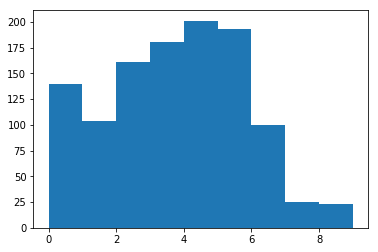

In [29]:
plt.hist(filteredTrial.Score, bins=list(range(10)))

subject comparison between trials

In [30]:
pilot1 = filteredTrial[(filteredTrial.payment == 1) & (filteredTrial.total_unique_trials == 80)].sort_values(by=["SubjectID", 'ImgID'])

In [31]:
pilot1 = pilot1[pilot1.imgName != 'empty-image-1.jpg']

In [32]:
matrix1 = np.array(pilot1.Score).reshape((len(pilot1)//160, 160))
subjects1 = list(sorted(set(pilot1.SubjectID), key=list(pilot1.SubjectID).index))

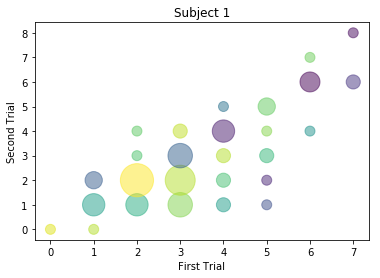

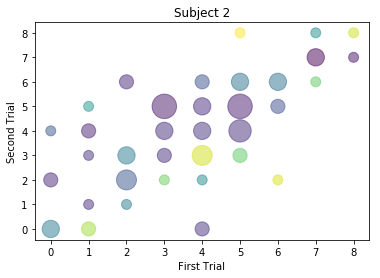

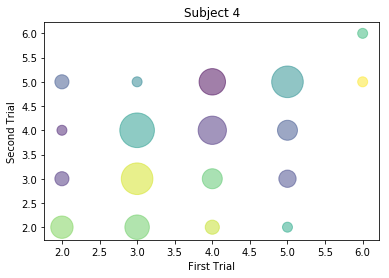

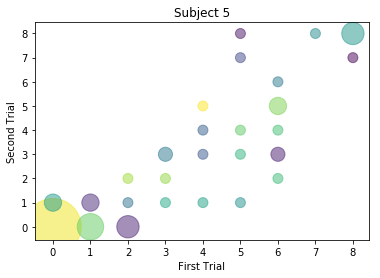

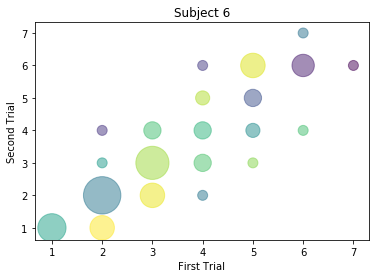

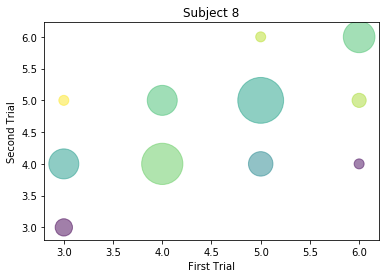

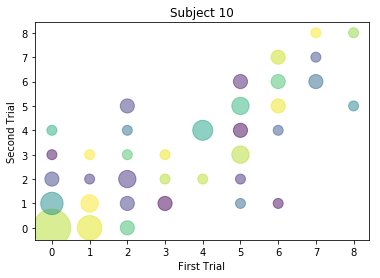

In [33]:
for sub, subid in zip(matrix1, subjects1):
    x_coor = sub[::2]
    y_coor = sub[1::2]
    
    # Find the unique sets
    unique_coor = sorted(set(zip(x_coor, y_coor)))
    total_coor = list(zip(x_coor, y_coor))

    size = []
    for coor in unique_coor:
        size.append(total_coor.count(coor))

    x_unique_coor, y_unique_coor = zip(*unique_coor)

    colors = np.random.rand(len(x_unique_coor))
    plt.title('Subject ' + str(subid))
    plt.xlabel('First Trial')
    plt.ylabel('Second Trial')
    #standardize the scale
    plt.scatter(x_unique_coor, y_unique_coor, s=np.array(size) * 100 , alpha=0.5, c=colors)
    plt.show()

In [34]:
for subid, sub in zip(subjects1, matrix1):
    firstTrial = sub[::2]
    secondTrial = sub[1::2]
    print('Subject ' + str(subid)+ ':', scipy.stats.spearmanr(firstTrial, secondTrial))

Subject 1: SpearmanrResult(correlation=0.6810147852734896, pvalue=3.627568597508833e-12)
Subject 2: SpearmanrResult(correlation=0.6335767576504463, pvalue=2.836116450917553e-10)
Subject 4: SpearmanrResult(correlation=0.48369178125004747, pvalue=5.489216758952672e-06)
Subject 5: SpearmanrResult(correlation=0.8541969882896993, pvalue=7.34388381541905e-24)
Subject 6: SpearmanrResult(correlation=0.8910336663983246, pvalue=1.7737036228401253e-28)
Subject 8: SpearmanrResult(correlation=0.7124357846733574, pvalue=1.253866804254289e-13)
Subject 10: SpearmanrResult(correlation=0.7844774046183944, pvalue=7.442870035683801e-18)


In [35]:
pilot2 = filteredTrial[(filteredTrial.payment == 2) & (filteredTrial.total_unique_trials == 40)].sort_values(by=["SubjectID", 'ImgID'])

In [36]:
pilot2 = pilot2[pilot2.imgName != 'empty-image-1.jpg']

In [37]:
matrix2 = np.array(pilot2.Score).reshape((len(pilot2)//80, 80))
subjects2 = list(sorted(set(pilot2.SubjectID), key=list(pilot2.SubjectID).index))

In [38]:
for sub, subid in zip(matrix2, subjects2):
    print(subid)
    x_coor = sub[::2]
    y_coor = sub[1::2]
    # find  each unique coordinate

    # Find the unique sets
    unique_coor = sorted(set(zip(x_coor, y_coor)))
    total_coor = list(zip(x_coor, y_coor))

    size = []
    for coor in unique_coor:
        size.append(total_coor.count(coor))

    x_unique_coor, y_unique_coor = zip(*unique_coor)

    colors = np.random.rand(len(x_unique_coor))
    plt.title('Subject ' + str(subid))
    plt.xlabel('First Trial')
    plt.ylabel('Second Trial')
    plt.scatter(x_unique_coor, y_unique_coor, s=np.array(size) * 100 , alpha=0.5, c=colors)
    plt.show()

In [39]:
for subid, sub in zip(subjects2, matrix2):
    firstTrial = sub[::2]
    secondTrial = sub[1::2]
    print('Subject ' + str(subid)+ ':', scipy.stats.spearmanr(firstTrial, secondTrial))

In [40]:
pilot3 = filteredTrial[(filteredTrial.payment == 2) & (filteredTrial.total_unique_trials == 80)].sort_values(by=["SubjectID", 'ImgID'])

Mode Frequency of each subject:  
Empty Face: those who choose 0, will they have a smaller avg than the people who chose 9.  
* correlate

R -> Intraclass Correlations  
personality-project.org/r/html/ICC.html  
Clean the tester  
* make a lot of things into functions  
JS -> where is the mode going, where is the mode coming from  

In [41]:
emptyTrial = filteredTrial[filteredTrial.imgName == 'empty-image-1.jpg']

In [42]:
mode = []
for subID in list(emptyTrial.SubjectID):
    counts = filteredTrial.groupby(['SubjectID', 'Score']).count().loc[subID].max(axis=1)
    cDict = {counts.index[i]: counts[j] for i, j in zip(range(len(counts.index)), counts.index)}
    mode.append(max(cDict, key=lambda k: cDict[k]))

In [43]:
max(filteredTrial.groupby(['SubjectID', 'Score']).count().loc[2].max(axis=1))

35

In [44]:
modecount = []
for subID in list(emptyTrial.SubjectID):
    modecount.append(max(filteredTrial.groupby(['SubjectID', 'Score']).count().loc[subID].max(axis=1)))

In [45]:
emptyTrial['mode'] = mode
emptyTrial['modeCount'] = modecount

/Users/nicklin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nicklin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
emptyTrial = emptyTrial[['SubjectID', 'Score', 'mode', 'modeCount', 'rt', 'ImgID', 'imgName', 'trial_index', 'Age', 'Gender', 'Hispanic/Latino', 'Race', 'Education', 'State', 'Zipcode', 'payment', 'total_unique_trials']]

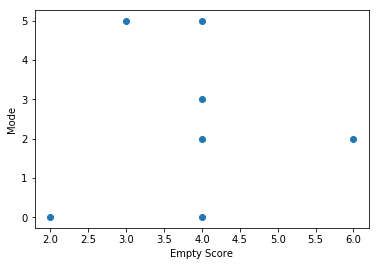

In [47]:
plt.xlabel('Empty Score')
plt.ylabel('Mode')
plt.scatter(emptyTrial.Score, emptyTrial['mode'])
plt.show()

ICC - Create the matrixs

In [48]:
import csv

In [49]:
with open('pilot1Matrix.csv', 'w', newline='') as f:
    matrixWriter = csv.writer(f)
    for subid, sub in zip(subjects1, matrix1):
        firstTrial = sub[::2]
        secondTrial = sub[1::2]
        matrixWriter.writerow(np.concatenate((firstTrial, secondTrial), axis=None))

In [50]:
with open('pilot2Matrix.csv', 'w', newline='') as f:
    matrixWriter = csv.writer(f)
    for subid, sub in zip(subjects2, matrix2):
        firstTrial = sub[::2]
        secondTrial = sub[1::2]
        matrixWriter.writerow(np.concatenate((firstTrial, secondTrial), axis=None))

interactive

In [51]:
adata = filteredTrial.groupby('imgName').agg(['mean', np.std]).sort_values(('ImgID', 'mean')).Score

In [52]:
%matplotlib notebook

make it so the faces all appear at once

<IPython.core.display.Javascript object>


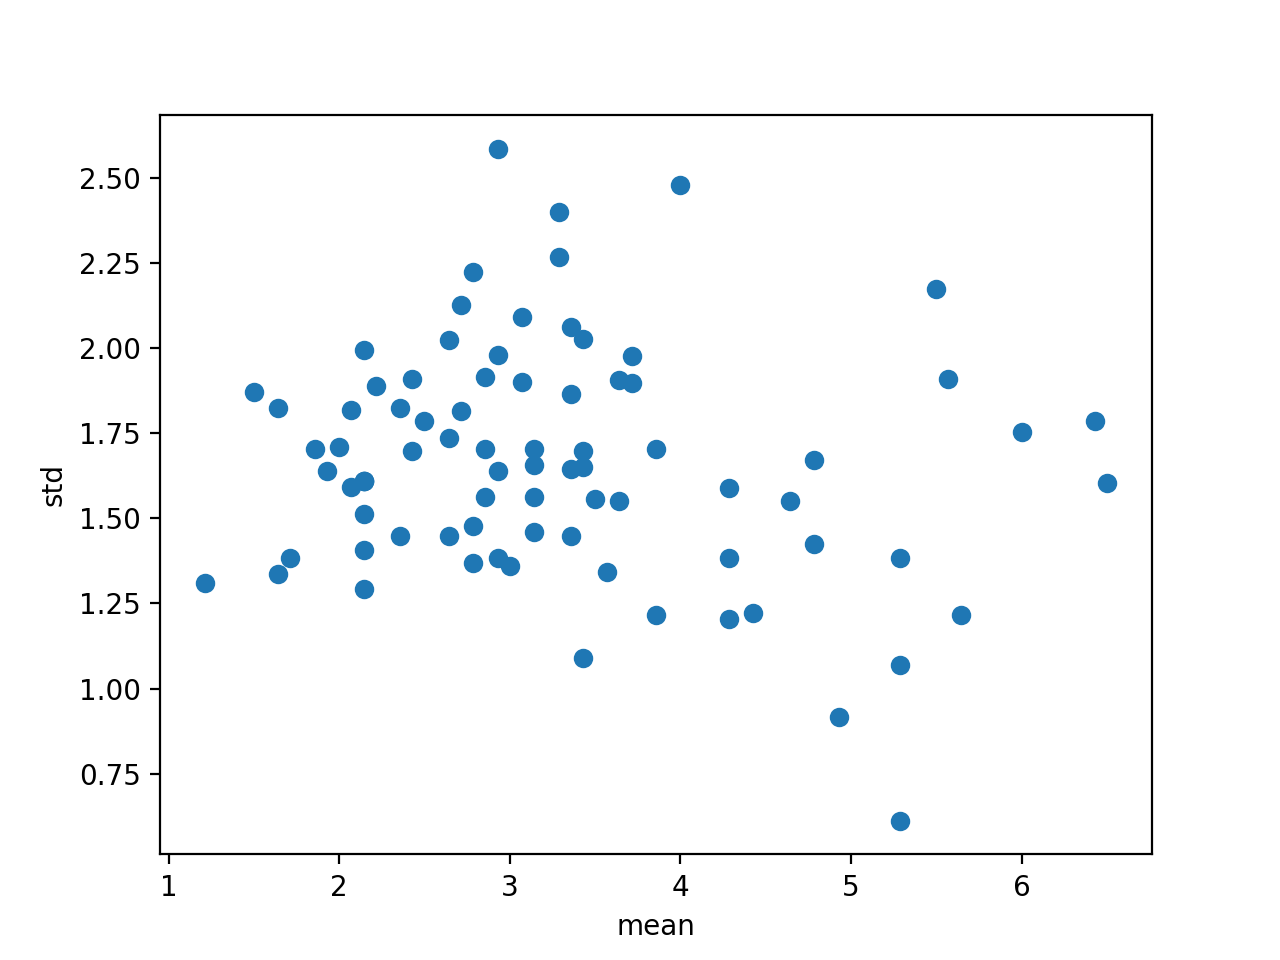

In [55]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Generate data x, y for scatter and an array of images.
x = list(adata['mean'])
y = list(adata['std'])
names = list(adata.index)
arr = []
for name in names:
    arr.append(mpimg.imread('../ptdir/static/images/2kfaces/' + name))
d = {(mean, std): z for mean,std,z in zip(x,y,arr)}

# create figure and plot scatter
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('mean')
plt.ylabel('std')

line, = ax.plot(x, y, ls="", marker="o")

# create the annotations box
im = OffsetImage(arr[0], zoom = .2)
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
    boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches() * fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(d[(x[ind], y[ind])])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)           
plt.show()


In [54]:
find correlation

SyntaxError: invalid syntax (<ipython-input-54-01c585496158>, line 1)